In [37]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch


filename = 'model_res_180913_outer_validation_after_epoch_100.dat'

In [38]:
saved = torch.load(filename)

train_loss = saved['train_loss']
train_accuracy = saved['train_accuracy']
test_loss = saved['test_loss']
test_accuracy = saved['test_accuracy']
test_confusion = saved['test_confusion']
if 'classes' in saved.keys():
    classes = saved['classes']
else:
    classes =  {'mildNPDR': 0, 'modNPDR': 1, 'normal': 2, 'severe_NPDR': 3}

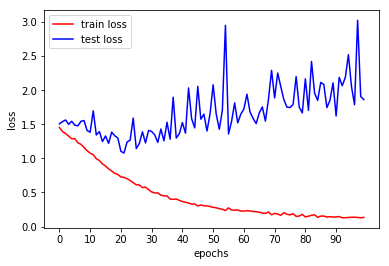

In [39]:
plt.plot(train_loss.numpy(), 'r', label='train loss')
plt.plot(test_loss.numpy(), 'b', label='test loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.xticks(np.arange(0,train_loss.size(0), 10))
plt.show()
#plt.savefig('loss.png')

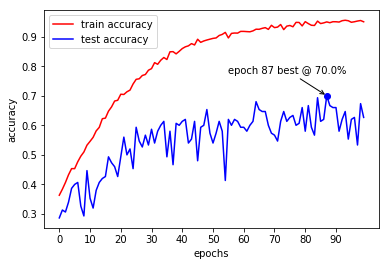

In [40]:
best_epoch = int(np.argmax(test_accuracy.numpy()))
max_accuracy = np.max(test_accuracy.numpy())

plt.plot(train_accuracy.numpy(), 'r', label='train accuracy')
plt.plot(test_accuracy.numpy(), 'b', label='test accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xticks(np.arange(0,train_accuracy.size(0), 10))
plt.plot(best_epoch, max_accuracy, 'bo')
plt.annotate(
        'epoch {} best @ {:.1f}%'.format(best_epoch, max_accuracy*100),
        xy=(best_epoch, max_accuracy), xytext=(20, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()
#plt.savefig('accuracy.png')

In [41]:
#ax = plt.subplots(1, min(5,test_confusion.size(0)), True, True)
#ax[1][0].set_ylabel('predicted label')
#ax[1][0].set_yticklabels(classes.keys())
#for ii in range(min(5,test_confusion.size(0))):
#    ax[1][ii].imshow(test_confusion[-1-ii,:,:].numpy()[::-1,:], origin='lower')
#    ax[1][ii].set_xlabel('true label')
#    ax[1][ii].set_xticks(np.arange(test_confusion.size(2)))
#    ax[1][ii].set_xticklabels(reversed(sorted(classes.keys())), rotation=90)
#    ax[1][ii].set_yticks(np.arange(test_confusion.size(2)))
#plt.show()
#ax[0].savefig('confusion.png')
print(classes)
print('Best accuracy after epoch {} @ {:.1f}%'.format(best_epoch, max_accuracy*100))
print(test_confusion[best_epoch,:,:])

print('in percent:\n', test_confusion[best_epoch,:,:].numpy()/test_confusion.numpy()[0,:,0].sum()*100)


{'PDR': 0, 'mildNPDR': 1, 'modNPDR': 2, 'noDMR': 3, 'severe_NPDR': 4}
Best accuracy after epoch 87 @ 70.0%
tensor([[27.,  0.,  1.,  0.,  0.],
        [ 0.,  6.,  2.,  0.,  2.],
        [ 1.,  3., 17.,  1.,  1.],
        [ 1., 20.,  7., 29.,  1.],
        [ 1.,  1.,  3.,  0., 26.]])
in percent:
 [[90.         0.         3.3333335  0.         0.       ]
 [ 0.        20.         6.666667   0.         6.666667 ]
 [ 3.3333335 10.        56.666668   3.3333335  3.3333335]
 [ 3.3333335 66.66667   23.333334  96.666664   3.3333335]
 [ 3.3333335  3.3333335 10.         0.        86.666664 ]]


In [42]:
print('Reduction to 2-class problem:')
confusion_2class = np.vstack((np.vstack((test_confusion[best_epoch,:,(1,3)].sum(1),
                                         test_confusion[best_epoch,:,(0,2,4)].sum(1)))[:,(1,3)].sum(1), 
                              np.vstack((test_confusion[best_epoch,:,(1,3)].sum(1),
                                         test_confusion[best_epoch,:,(0,2,4)].sum(1)))[:,(0,2,4)].sum(1))
                            )
print('Accuracy: {:.1f}%'.format(np.diag(confusion_2class).sum()/confusion_2class.sum()*100))
print('Column 1: noDMR + mild NPDR\nColumn 2: moderate + severe NPDR, PDR')
print(confusion_2class)
print('Sensitivity: {:.1f}%'.format(confusion_2class[1,1]/confusion_2class[:,1].sum()*100))
print('Specificity: {:.1f}%'.format(confusion_2class[0,0]/confusion_2class[:,0].sum()*100))

Reduction to 2-class problem:
Accuracy: 88.0%
Column 1: noDMR + mild NPDR
Column 2: moderate + severe NPDR, PDR
[[55. 13.]
 [ 5. 77.]]
Sensitivity: 85.6%
Specificity: 91.7%


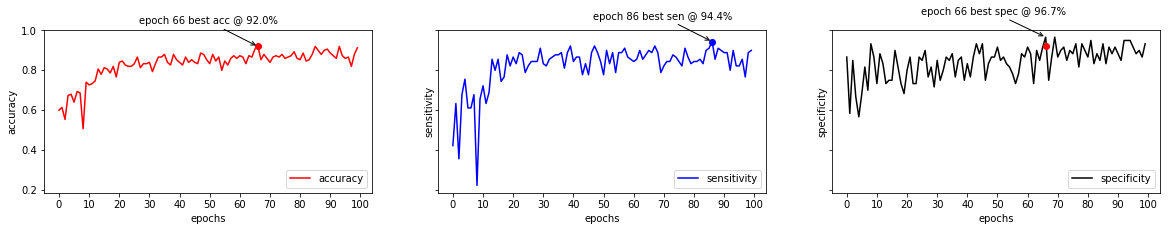

Best accuracy in epoch 66 with accuracy 92.0%, sensitivity 88.9%, specificity 96.7%
Best sensitivity in epoch 86 with accuracy 90.0%, sensitivity 94.4%, specificity 83.3%
Best specificity in epoch 66 with accuracy 92.0%, sensitivity 88.9%, specificity 96.7%


In [45]:
specificity = np.zeros_like(test_accuracy)
sensitivity = np.zeros_like(test_accuracy)
accuracy = np.zeros_like(test_accuracy)
for ii in range(specificity.size):
    confusion_2class = np.vstack((np.vstack((test_confusion[ii,:,(1,3)].sum(1),
                                         test_confusion[ii,:,(0,2,4)].sum(1)))[:,(1,3)].sum(1), 
                              np.vstack((test_confusion[ii,:,(1,3)].sum(1),
                                         test_confusion[ii,:,(0,2,4)].sum(1)))[:,(0,2,4)].sum(1))
                            )
    accuracy[ii] = np.diag(confusion_2class).sum()/confusion_2class.sum()
    sensitivity[ii] = confusion_2class[1,1]/confusion_2class[:,1].sum()
    specificity[ii] = confusion_2class[0,0]/confusion_2class[:,0].sum()

max_acc = np.max(accuracy)
best_acc = np.argmax(accuracy)
max_sen = np.max(sensitivity)
best_sen = np.argmax(sensitivity)
max_spe = np.max(specificity)
best_spe = np.argmax(specificity)


ax = plt.subplots(1, 3, True, True, figsize=(20,3))

ax[1][0].plot(accuracy, 'r', label='accuracy')
ax[1][0].plot(best_acc, max_acc, 'ro')
ax[1][0].annotate(
        'epoch {} best acc @ {:.1f}%'.format(best_acc, max_acc*100),
        xy=(best_acc, max_acc), xytext=(20, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[1][0].legend(loc='lower right')
ax[1][0].set_ylabel('accuracy')
ax[1][0].set_xlabel('epochs')
ax[1][0].set_xticks(np.arange(0,accuracy.size+1, 10))

ax[1][1].plot(sensitivity, 'b', label='sensitivity')
ax[1][1].plot(best_sen, max_sen, 'bo')
ax[1][1].annotate(
        'epoch {} best sen @ {:.1f}%'.format(best_sen, max_sen*100),
        xy=(best_sen, max_sen), xytext=(20, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[1][1].legend(loc='lower right')
ax[1][1].set_xlabel('epochs')
ax[1][1].set_ylabel('sensitivity')
ax[1][1].set_xticks(np.arange(0,accuracy.size+1, 10))

ax[1][2].plot(specificity, 'k', label='specificity')
ax[1][2].plot(best_acc, max_acc, 'ro')
ax[1][2].annotate(
        'epoch {} best spec @ {:.1f}%'.format(best_spe, max_spe*100),
        xy=(best_spe, max_spe), xytext=(20, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[1][2].legend(loc='lower right')
ax[1][2].set_xticks(np.arange(0,accuracy.size+1, 10))
ax[1][2].set_ylabel('specificity')
ax[1][2].set_xlabel('epochs')
plt.show()

print('Best accuracy in epoch {} with accuracy {:.1f}%, sensitivity {:.1f}%, specificity {:.1f}%'.format(
       best_acc, accuracy[best_acc]*100, sensitivity[best_acc]*100, specificity[best_acc]*100))
print('Best sensitivity in epoch {} with accuracy {:.1f}%, sensitivity {:.1f}%, specificity {:.1f}%'.format(
       best_sen, accuracy[best_sen]*100, sensitivity[best_sen]*100, specificity[best_sen]*100))
print('Best specificity in epoch {} with accuracy {:.1f}%, sensitivity {:.1f}%, specificity {:.1f}%'.format(
       best_spe, accuracy[best_spe]*100, sensitivity[best_spe]*100, specificity[best_spe]*100))
